# Visualization of Learning

In [ ]:
import numpy as np
# 对计算100000次均值为0的泊松分布计时
import time
time_now = time.time()
for _ in range(1000000):
    np.random.poisson(0)
print(time.time()-time_now)

time_now = time.time()
for _ in range(1000000):
    a = 0
print(time.time()-time_now)

# give me a random key
animals = ['cat', 'dog', 'fish', 'bird', 'elephant', 'lion', 'tiger', 'bear', 'panda', 'monkey']
animals_value = np.random.randint(0, 10, 10)
animals_dict = dict(zip(animals, animals_value))
for key, value in animals_dict.items():
    print(key, value)

In [ ]:
# high-dimensional reacher
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=2, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)
    
plt.figure(figsize=(8,6))
file_pre = './'
y=np.load(file_pre+'rewards_lstm.npy')
y_=np.load(file_pre+'rewards.npy')

x=np.arange(len(y))
episode_length = 150
x = episode_length*x
plt.plot(x, smooth(y), label = 'SAC_LSTM', color='b')
plt.plot(x, smooth(y_), label = 'SAC', color='r')

plt.xlabel('Samples')
plt.ylabel('Reward')
# plt.ylim(0)
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('reward_compare.pdf')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

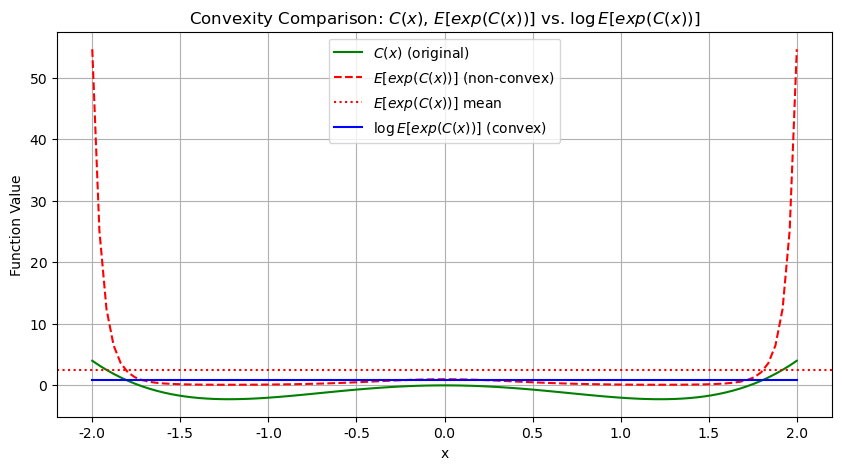

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

# Define C(x) as a non-convex function
def C(x):
    return x**4 - 3*x**2

# Generate x-axis values
x = np.linspace(-2, 2, 100)
C_x = C(x)

# Calculate E[exp(C(x))] (assuming uniform distribution)
E_exp_C = np.mean(np.exp(C_x))

# Calculate log(E[exp(C(x))])
log_E_exp_C = np.log(E_exp_C)

# Calculate E[exp(C(x))] at each x
E_exp_C_x = np.exp(C_x)

# Calculate log E[exp(C(x))] at different x (using logsumexp for approximation)
log_E_exp_C_x = logsumexp(C_x) - np.log(len(x))

# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(x, C_x, label=r'$C(x)$ (original)', linestyle='solid', color='g')
plt.plot(x, E_exp_C_x, label=r'$E[exp(C(x))]$ (non-convex)', linestyle='dashed', color='r')
plt.axhline(y=E_exp_C, color='r', linestyle='dotted', label=r'$E[exp(C(x))]$ mean')
plt.plot(x, np.full_like(x, log_E_exp_C_x), label=r'$\log E[exp(C(x))]$ (convex)', linestyle='solid', color='b')

plt.xlabel("x")
plt.ylabel("Function Value")
plt.title("Convexity Comparison: $C(x)$, $E[exp(C(x))]$ vs. $\log E[exp(C(x))]$")
plt.legend()
plt.grid()
plt.show()
